### Accept Reject Sampling

The problem with the previous Inverse Transform method is that we need access to the CDF, and even if we have it, inversing it might be hard. AR Sampling is a method that solves this, and might not even require a PDF.

There are however, some terms we should first understand. Mainly: 

#### Normalizing Constant

From wikipedia: The concept of a normalizing constant arises in probability theory and a variety of other areas of mathematics. The normalizing constant is used to reduce any probability function to a probability density function with total probability of one.

So the idea here is that we can take any distribution formula, for example normal distribution, exponential distribution and turn it into a probability density function by applying a normalizing constant. This normalizing constant is usually given by: 

$NC = \int^{-\infty}_{-\infty} f(s) \space ds$

Then applying it to any distribution function 

$ p(S) = \frac {f(s)} {NC}$

where $p(s)$ is the probability density function


In this sampling method we assume we know the formula for $f(s)$ but not the normalizing constant $NC$. This is the case where its hard to integrate $f(s)$ e.g. in the case of complicated piecewise functions. **In this case, how do we sample from $p(s)$ ?**

#### The method

1. We sample from some other function $g(s)$ which is close to $p(s)$ and easy to sample.
    The sample should ideally be: 
    * Easy to sample from 
    * It lies within the same domain as $p(s)$
2. Scale $g(s)$ by $M$ so that it is always above $f(s)$
3. We sample from $g(s)$. We accept this sample with the prob $\frac {f(s)} {M x g(s)}$. We know this is a probability because of Step 2! 
4. After some iterations, we look at the "Accepted" and "Rejected" Pile. The accepted pile should follow closely $p(s)$

### An explanation on the intuition behind AR-Sampling:

$P(Suggesting \space point \space  s | Accepted) = \frac {P(Accepted | Suggesting \space point \space  s) P(Suggesting \space point \space  s)} {P(Accepted)}$ , using bayes theorem.

**From the top:** 

$P(Suggesting \space point \space  s | Accepted) = \large \frac {\frac {f(s)} {M x g(s)} x g(s)} {P(Accepted)}$

**And so,** 

$P(Accepted) = \int^{\infty}_{-\infty} g(s) \frac {f(s)} {Mg(s)} = \frac 1 M \int^{\infty}_{-\infty} f(s) \space ds = \frac {NC} M$

$ {\frac {f(s)} {M x g(s)}}$ is the probability we will get point s and accept it (from above).

$g(s)$ is the probability we will get *proposed* a point s.



$P(Suggesting \space point \space  s | Accepted) = \frac {f(s)/M} {NC/M}=\frac {f(s)} {NC} = p(s)$

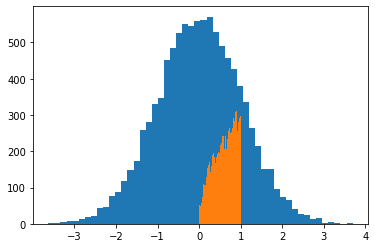

In [47]:
g = np.random.normal(size = (10000,))
f = np.random.power(1.5, size = (10000, ))

nhist = plt.hist(g, bins = 50)
phist = plt.hist(f, bins = 50)
plt.show() 

no we can see as an example if we let $f/g$ where $g$ is our approximation to the distribution, the closer $g$ is to $f$, the closer we get to 1, and so the better estimation the graph $g$ is to $f$

So what does $\frac {f(s)} {g(s)}$ actually mean?

if the numerator is high, the sample is very very likely in $g(s)$. $M$ is just there to scale everything down to a probability. 

### Limitations

From wiki: 
Rejection sampling can lead to a lot of unwanted samples being taken if the function being sampled is highly concentrated in a certain region, for example a function that has a spike at some location. For many distributions, this problem can be solved using an adaptive extension (see adaptive rejection sampling), or with an appropriate change of variables with the method of the ratio of uniforms.

<div style="width:300px">
    
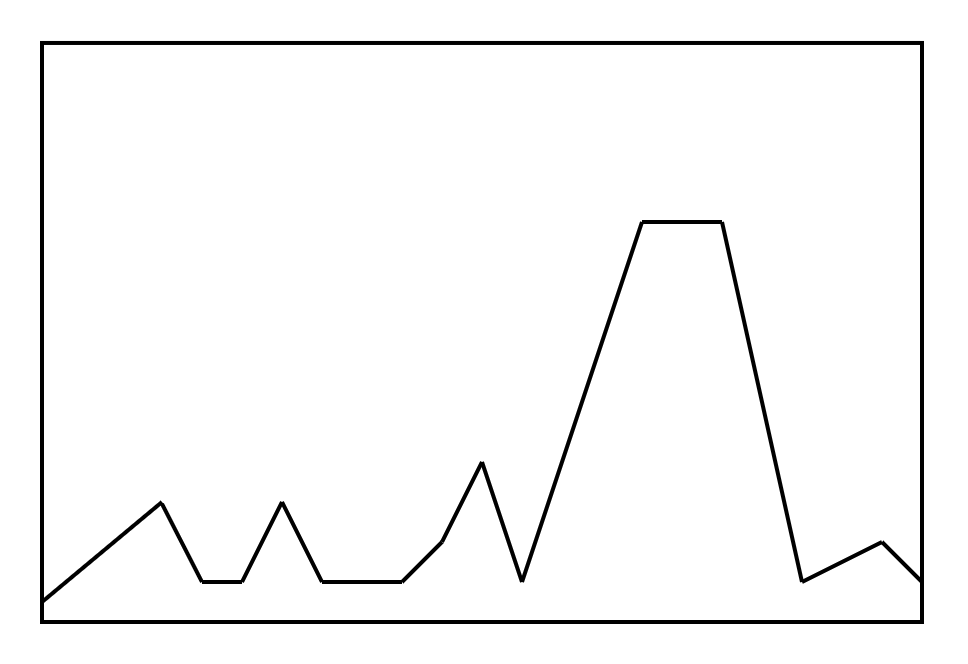
    
</div>

This leads to huge $M$ values to acommodate the spike, and small $\frac {NC} {M}$, which leads to a very long time to sample the accepted points to simular $p(s)$

#### References

[Accept-Reject Sampling : Data Science Concepts](https://www.youtube.com/watch?v=OXDqjdVVePY) | Youtube